# Facebook Comments Volume

Trata-se de um problema de regressão descrito no
artigo [Facebook Comments
Volume](http://uksim.info/uksim2015/data/8713a015.pdf).

O objetivo que se
deseja alcançar nesta solução é de acordo com as informações de entrada sobre um
determinado post, predizer qual o número de comentários ele irá receber em uma
determinada quantidade de horas.

Os dados foram obtidos através de um
***crawler*** nas páginas do facebook, logo após foram pré-processadas e
divididas temporalmente. O [conjunto de dados](./Dataset.zip) fornecidos pelo
problema estão separados em dados para treino e para teste.

De acordo com o
autor, foram obtidos 5 diferentes tipos de dados para o treino, separados
temporalmente em Variante 1, 2, 3, 4 e 5.

## Dados

Há um total de 54
***features***, essas features são representações para as colunas abaixo.

|Número da coluna|Nome|Origem da feature|Descrição|
|----------------|----|-----------------|---------|
|1|Popularidade/*Likes* da páginaPage|*Feature* da página|Define a popularidade da página ou o suporte para a fonte dos documentos.|
|2|Página Checking|*Feature* da página|Descreve quantos individuos diferentes visitaram a página|
|3|Falano sobre a página|*Feature* da página|Define o interese diário de indivídos em relação ao conteúdo da página. Ou seja, pessoas que voltam ou tem alguma ação sobre a página.|
|4|Categoria da página|*Feature* da página|Define a categoria da página. Ex.: lugar, instituição...|
|5 - 29|Derivado|*Feature* derivada |São features que foram associadas a página calculando através de outras features básicas.|
|30|CC1|*Feature* essencial|Número total de comentários antes do tempo base selecionado.|
|31|CC2|*Feature* essencial|O número de comentários nas 24 horas atrás|
|32|CC3|*Feature* essencial|O número de comentários nas 48 horas atras e 24 horas relativas ao tempo base.|
|33|CC4|*Feature* essencial|O número de comentários nas primeiras 24 horas após a publicação, mas antes do tempo base.|
|34|CC5|*Feature* essencial|Diferença entre CC2 e CC3.|
|35|Tempo base|Outra *feature*|Tempo selecionado para simular o cenário.|
|36|Tamanho do *post*|Outra *feature*|Contagem de caracteres no *post*.|
|37|*Post* compartilhados|Outra *feature*|É a contagem de pessoas que compartilharam o *post* em sua linha do tempo.|
|38|Promoção do estado do *Post*|Outra *feature*|Pessoas que promoveram (1) ou não (0) a página que apareceu na lista de novas notícias.|
|39|H Local|Outra *feature*|Descreve o número de horas que passaram para o alvo de comentários recebidos.|
|40-46|Dia da semana da publicação|Dia da semana|Representa o dia da semana que foi publicado o post (Domingo até Sábado).|
|47-53|Dia do tempo base|Dia da semana|Representa o dia (Domingo até Sábado) que foi selecionado o tempo base.|
|54|Variável alvo|Alvo|O número de comentários nas próximas H horas.|

## Obtenção dos dados

Os dados
estão organizados na pasta
`./Dataset/Training/Features_Variant_X.csv`, em que X
é um dos valores de
variação (1, 2, 3, 4, 5).

|Número de registros|Nome do arquivo|Tamanho|
|-------------------|---------------|-------|
|40949|Features_Variant_1.csv|13M|
|81312|Features_Variant_2.csv|26M|
|121098|Features_Variant_3.csv|39M|
|160424|Features_Variant_4.csv|51M|
|199030|Features_Variant_5.csv|64M|


A primeira amostra que trabalharemos
consistem em 40948 inputs de treinamento e 10043 inputs de teste, ambos com 53
colunas cada.
Lembrando que para rodar o código parser.py é necessário
descompactar o arquivo do dataset.
Primeiro precisamos obter as pastas onde se
encontram os arquivos. Para isso usaremos o import os (ou Operating system) e
como a extenção dos arquivos é .csv, será utilizada a biblioteca
[pandas](http://pandas.pydata.org/).

In [1]:
import os
# Load dirs name
cur_dir = os.path.realpath('.')
data_dir = os.path.join(cur_dir,'Dataset')
# Obtaining directories
train_dir = os.path.join(data_dir,'Training')
print(train_dir)
test_dir = os.path.join(data_dir,'Testing', 'TestSet')
print(test_dir)

/home/marcelof/UnB/ml/CommentVolumeML/Dataset/Training
/home/marcelof/UnB/ml/CommentVolumeML/Dataset/Testing/TestSet


#### Obtendo local dos arquivos

Agora com os diretórios em mãos podemos obter
os arquivos do tipo csv para teste e treinamento. Ao final iremos ordenar a
lista para podemos acessar o arquivos que queremos pelo indice, ja que não
necessáriamente ele vai ler em ordem alfabetica.

In [2]:
list_train = []
list_test = []
# Obtain train files
for x in os.listdir(train_dir):
    if(x.endswith(".csv")):
        list_train.append(os.path.join(train_dir, x))

for x in os.listdir(test_dir):
    if(x.endswith(".csv")):
        list_test.append(os.path.join(test_dir, x))

# Sorting array to access the required ones
list_train = sorted(list_train)
list_test = sorted(list_test)

print("Train List: ", list_train, "\n")
print("Test List: ", list_test)

Train List:  ['/home/marcelof/UnB/ml/CommentVolumeML/Dataset/Training/Features_Variant_1.csv', '/home/marcelof/UnB/ml/CommentVolumeML/Dataset/Training/Features_Variant_2.csv', '/home/marcelof/UnB/ml/CommentVolumeML/Dataset/Training/Features_Variant_3.csv', '/home/marcelof/UnB/ml/CommentVolumeML/Dataset/Training/Features_Variant_4.csv', '/home/marcelof/UnB/ml/CommentVolumeML/Dataset/Training/Features_Variant_5.csv'] 

Test List:  ['/home/marcelof/UnB/ml/CommentVolumeML/Dataset/Testing/TestSet/Test_Case_1.csv', '/home/marcelof/UnB/ml/CommentVolumeML/Dataset/Testing/TestSet/Test_Case_10.csv', '/home/marcelof/UnB/ml/CommentVolumeML/Dataset/Testing/TestSet/Test_Case_2.csv', '/home/marcelof/UnB/ml/CommentVolumeML/Dataset/Testing/TestSet/Test_Case_3.csv', '/home/marcelof/UnB/ml/CommentVolumeML/Dataset/Testing/TestSet/Test_Case_4.csv', '/home/marcelof/UnB/ml/CommentVolumeML/Dataset/Testing/TestSet/Test_Case_5.csv', '/home/marcelof/UnB/ml/CommentVolumeML/Dataset/Testing/TestSet/Test_Case_6.csv'

Tendo os paths dos arquivos em mãos podemos obter os dados. Para fazer isso
de
forma eficiente podemos utilizar a biblioteca Pandas.

#### Definição das colunas

Para a correa montagem do data frame, definimos as
colunas e o
caminho para o arquivo onde está presente o primeiro dataset do
problema.
Portanto, é esperado que, caso o pandas leia corretamente, tenham
40949
registros em 54 colunas.

In [3]:
columns = ["Page Popularity/likes", "Page Checkinsâ€™s", "Page talking about",
           "Page Category", "Derived", "Derived", "Derived", "Derived",
           "Derived", "Derived", "Derived", "Derived", "Derived",
           "Derived", "Derived", "Derived", "Derived", "Derived",
           "Derived", "Derived", "Derived", "Derived", "Derived",
           "Derived", "Derived", "Derived", "Derived", "Derived",
           "Derived", "CC1", "CC2", "CC3", "CC4", "CC5", "Base time",
           "Post length", "Post Share Count", "Post Promotion Status", "H Local",
           "Post Sunday", "Post Monday", "Post Tuesday", "Post Wednesday", "Post Thursday", "Post Friday", "Post Saturday",
           "Base Sunday", "Base Monday", "Base Tuesday", "Base Wednesday", "Base Thursday", "Base Friday", "Base Saturday",
           "Target Variable"]
print(len(columns), columns)

54 ['Page Popularity/likes', 'Page Checkinsâ€™s', 'Page talking about', 'Page Category', 'Derived', 'Derived', 'Derived', 'Derived', 'Derived', 'Derived', 'Derived', 'Derived', 'Derived', 'Derived', 'Derived', 'Derived', 'Derived', 'Derived', 'Derived', 'Derived', 'Derived', 'Derived', 'Derived', 'Derived', 'Derived', 'Derived', 'Derived', 'Derived', 'Derived', 'CC1', 'CC2', 'CC3', 'CC4', 'CC5', 'Base time', 'Post length', 'Post Share Count', 'Post Promotion Status', 'H Local', 'Post Sunday', 'Post Monday', 'Post Tuesday', 'Post Wednesday', 'Post Thursday', 'Post Friday', 'Post Saturday', 'Base Sunday', 'Base Monday', 'Base Tuesday', 'Base Wednesday', 'Base Thursday', 'Base Friday', 'Base Saturday', 'Target Variable']


#### Leitura dos dados

Agora, faremos a leitura dos dados com o suporte da
biblioteca pandas, em que passamos o local do arquivo e o nome das colunas.

In [4]:
import pandas
trainData = pandas.read_csv(list_train[4], names=columns)
testData = pandas.read_csv(list_test[1], names=columns)
print('Train file: ', list_train[4])
print('Test file: ', list_test[0])
print("Quantidade de dados de treinamento")
print(len(trainData))
print("Quantidade de dados de teste")
print(len(testData))
trainData.head()

Train file:  /home/marcelof/UnB/ml/CommentVolumeML/Dataset/Training/Features_Variant_5.csv
Test file:  /home/marcelof/UnB/ml/CommentVolumeML/Dataset/Testing/TestSet/Test_Case_1.csv
Quantidade de dados de treinamento
199030
Quantidade de dados de teste
100


,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived,Derived.1,Derived.2,Derived.3,Derived.4,Derived.5,...,Post Friday,Post Saturday,Base Sunday,Base Monday,Base Tuesday,Base Wednesday,Base Thursday,Base Friday,Base Saturday,Target Variable
0,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,0,0,0,0,0,0,1,0,0,0
1,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,0,0,1,0,0,0,0,0,0,0
2,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,0,0,0,0,0,0,1,0,0,0


#### Plotando os dados

Plotaremos os dados das colunas geradas pelo autor dos dados para verificar se
há relação entre as colunas. Utilizou-se apenas uma amostragem de 5000 dados

<IPython.core.display.Javascript object>


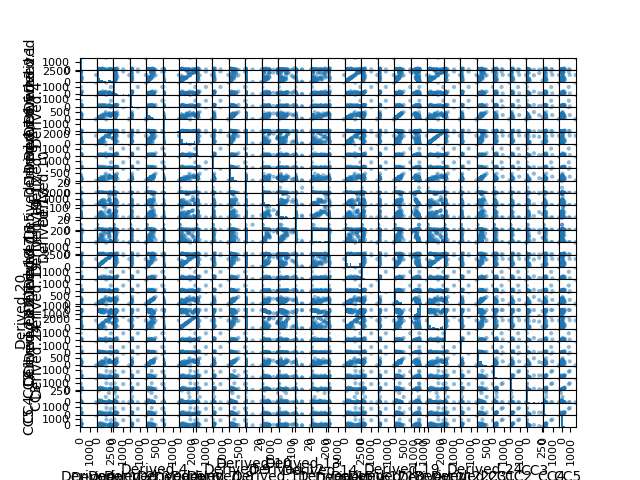

CPU times: user 48.3 s, sys: 6.3 s, total: 54.6 s
Wall time: 48.3 s


In [5]:
%%time
%matplotlib notebook

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(testData.loc[:5000, 'Derived':'CC5'])


## Tratamento

Será realizada as etapas de *feature selection* e *feature
engineering*.

#### Correlação entre features

Será realizada uma análise da
correlação entre as *features*. Visto que há um total de 24 colunas que foram
fruto de engenharia de caracerísticas, e que, o autor não especificou quais
foram as operações realizadas entre elas e portanto, esta análize ajudará a
identificar as relações entre as *features*.

##### O que é

A correlação entre duas variáveis é quando existe algum laço matemático que
envolve o valor de duas variáveis de alguma forma ([ESTATÍSTICA II - CORRELAÇÃO
E REGRESSÃO](http://www.ctec.ufal.br/professor/mgn/05CorrelacaoERegressao.pdf)).

Uma das maneiras mais simples de se identificar a correlação entre duas
variáveis é plotando-as em um gráfico, para tentar identificar alguma relação
entre elas.

Suponha os seguintes dados: X representa o número de visitas totais em uma
página do facebook e Y o número de curtidas que esta página possui.

|Visitas|Curtidas|
|-------|--------|
|25000|5000|
|1000|95|
|10000|1500|
|12000|1900|
|20005|3700|
|5000|1200|
|3000|600|
|15000|3000|

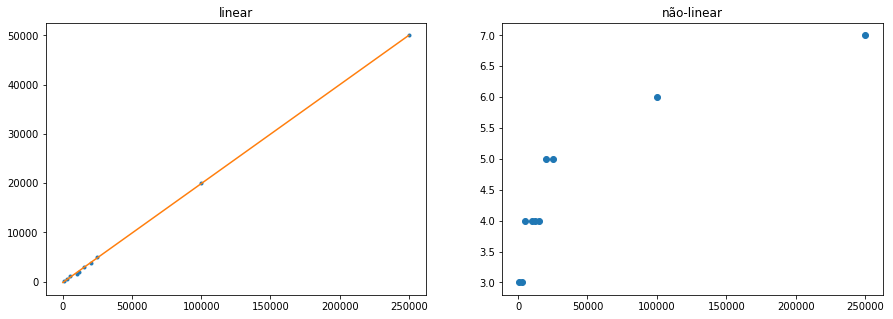

In [6]:
%matplotlib inline
X, Y = 0, 1

import numpy as np
from scipy.stats import linregress

fig, (ax, ax2) = plt.subplots(1, 2, figsize=[15,5])
data = np.array([[25000,1000,10000,12000,20005, 5000, 3000, 15000, 250000, 100000], [5000,95,1500,1900,3700, 1200, 600, 3000, 50000, 20000]])

ax.plot(data[X], data[Y], '.')

# Calcula regressão linear para a*m + b
m, b, R, p, SEm = linregress(data[X], data[Y])
x2 = np.array([0, data[X].max()])
ax.plot(x2, m * x2 + b)
ax.set_title('linear')

# Dato não linear, relação de raiz quadrada
ax2.set_title('não-linear')
data[Y] = data[X]**(1/6)
chart = ax2.plot(data[X], data[Y], 'o')

Com o gráfico, fica bastante claro a correlação das variáveis X e Y do exemplo.
E inclusive o tipo de correlação não-linear.

#### Tipos de correlação

Existem vários métodos para calculo do coeficiente de correlação entre duas
variáveis, pearson, kendall e spearman.
* [Pearson](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de
_Pearson): mede o grau da correlação (e a direcção dessa correlação - se
positiva ou negativa) entre duas variáveis de escala métrica (intervalar ou de
rácio/razão).
* [Kendall](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_ta
u_de_Kendall): medir a correlação de postos entre duas quantidades medidas.
* [Spearman](): A correlação de Spearman entre duas variáveis é igual à
correlação de Pearson entre os valores de postos daquelas duas variáveis.
Enquanto a correlação de Pearson avalia relações lineares, a correlação de
Spearman avalia relações monótonas, sejam elas lineares ou não.

Para nosso problema utilizaremos o método de pearson, pois queremos medir apenas
o grau de correlação entre as variáveis do problema.

In [9]:
import numpy as np
corrData=trainData.corr('pearson')
corrData

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived,Derived.1,Derived.2,Derived.3,Derived.4,Derived.5,...,Post Friday,Post Saturday,Base Sunday,Base Monday,Base Tuesday,Base Wednesday,Base Thursday,Base Friday,Base Saturday,Target Variable
Page Popularity/likes,1.000000,0.045090,0.622700,-0.042003,0.046600,0.157902,0.165026,0.147022,0.173462,0.046528,...,-0.009949,0.002727,-0.003590,-0.001345,0.002757,0.007740,0.001449,-0.001514,-0.005663,0.064537
Page Checkinsâ€™s,0.045090,1.000000,0.167326,-0.060345,-0.007382,0.158831,0.151055,0.129424,0.169037,-0.006570,...,-0.006156,0.008358,0.000764,0.000087,0.000197,-0.001587,0.002071,-0.001521,-0.000045,0.035152
Page talking about,0.622700,0.167326,1.000000,-0.148164,0.118685,0.484869,0.515621,0.457754,0.539581,0.119260,...,-0.027714,-0.007980,-0.014358,-0.006598,0.004262,0.023153,0.022747,-0.009419,-0.021087,0.194768
Page Category,-0.042003,-0.060345,-0.148164,1.000000,-0.026591,-0.319812,-0.233917,-0.193385,-0.291309,-0.023868,...,0.002795,-0.002126,0.002386,-0.004504,-0.003690,-0.001920,-0.001325,0.003916,0.005049,-0.069001
Derived,0.046600,-0.007382,0.118685,-0.026591,1.000000,0.072641,0.335366,0.409813,0.130532,0.930690,...,-0.003884,-0.005278,-0.000426,-0.006805,0.001074,0.002660,-0.000129,0.006651,-0.003232,0.138996
Derived.1,0.157902,0.158831,0.484869,-0.319812,0.072641,1.000000,0.715212,0.582076,0.896815,0.079879,...,-0.010944,-0.009929,-0.005159,-0.005468,0.001918,0.011149,0.007315,-0.001381,-0.008924,0.238743
Derived.2,0.165026,0.151055,0.515621,-0.233917,0.335366,0.715212,1.000000,0.963216,0.903036,0.340154,...,-0.017454,-0.004056,-0.008361,-0.005993,0.003581,0.012472,0.009093,-0.003123,-0.008304,0.359536
Derived.3,0.147022,0.129424,0.457754,-0.193385,0.409813,0.582076,0.963216,1.000000,0.773769,0.412988,...,-0.015895,-0.001976,-0.007473,-0.005297,0.003135,0.010544,0.008291,-0.002518,-0.007247,0.349452
Derived.4,0.173462,0.169037,0.539581,-0.291309,0.130532,0.896815,0.903036,0.773769,1.000000,0.146383,...,-0.016705,-0.009671,-0.009642,-0.006710,0.003410,0.014783,0.011331,-0.003686,-0.010263,0.316593
Derived.5,0.046528,-0.006570,0.119260,-0.023868,0.930690,0.079879,0.340154,0.412988,0.146383,1.000000,...,-0.004534,-0.003742,-0.002532,-0.005779,0.001494,0.003371,0.003135,0.003903,-0.003902,0.153853


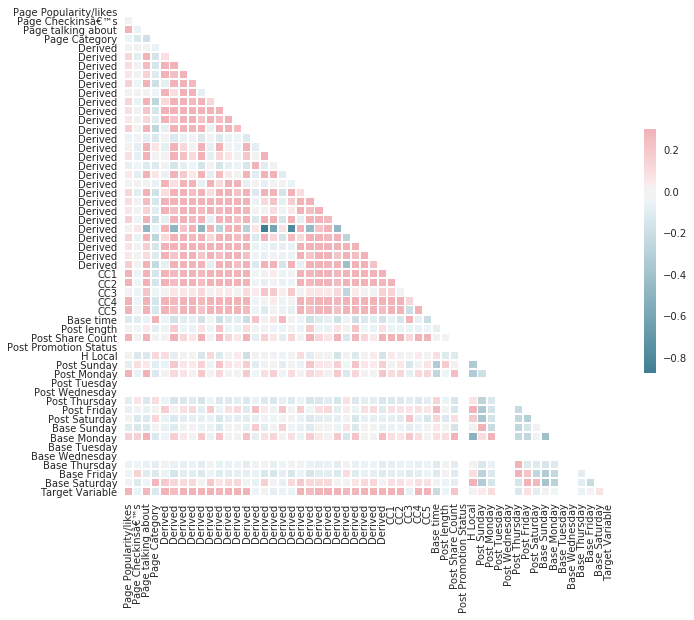

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm as cm
import seaborn as sns

corr = testData.corr()
sns.set(style="white")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.9, cbar_kws={"shrink": .5},
            yticklabels=columns,xticklabels=columns)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

##### Triangulo superior

Como a matriz de correlação gerada pelo dataframe é
uma matriz espelho. Então será removido a parte inferior da matriz

In [10]:
corrDataAbs = corrData.abs()
np.fill_diagonal(corrDataAbs.values, np.NaN)
upper_matrix = np.triu(np.ones(corrDataAbs.shape)).astype(np.bool)

upperTriangleCorr = corrDataAbs.where(upper_matrix)
upperTriangleCorr

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived,Derived.1,Derived.2,Derived.3,Derived.4,Derived.5,...,Post Friday,Post Saturday,Base Sunday,Base Monday,Base Tuesday,Base Wednesday,Base Thursday,Base Friday,Base Saturday,Target Variable
Page Popularity/likes,NaN,0.04509,0.622700,0.042003,0.046600,0.157902,0.165026,0.147022,0.173462,0.046528,...,0.009949,0.002727,0.003590,0.001345,0.002757,0.007740,0.001449,0.001514,0.005663,0.064537
Page Checkinsâ€™s,NaN,NaN,0.167326,0.060345,0.007382,0.158831,0.151055,0.129424,0.169037,0.006570,...,0.006156,0.008358,0.000764,0.000087,0.000197,0.001587,0.002071,0.001521,0.000045,0.035152
Page talking about,NaN,NaN,NaN,0.148164,0.118685,0.484869,0.515621,0.457754,0.539581,0.119260,...,0.027714,0.007980,0.014358,0.006598,0.004262,0.023153,0.022747,0.009419,0.021087,0.194768
Page Category,NaN,NaN,NaN,NaN,0.026591,0.319812,0.233917,0.193385,0.291309,0.023868,...,0.002795,0.002126,0.002386,0.004504,0.003690,0.001920,0.001325,0.003916,0.005049,0.069001
Derived,NaN,NaN,NaN,NaN,NaN,0.072641,0.335366,0.409813,0.130532,0.930690,...,0.003884,0.005278,0.000426,0.006805,0.001074,0.002660,0.000129,0.006651,0.003232,0.138996
Derived.1,NaN,NaN,NaN,NaN,NaN,NaN,0.715212,0.582076,0.896815,0.079879,...,0.010944,0.009929,0.005159,0.005468,0.001918,0.011149,0.007315,0.001381,0.008924,0.238743
Derived.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.963216,0.903036,0.340154,...,0.017454,0.004056,0.008361,0.005993,0.003581,0.012472,0.009093,0.003123,0.008304,0.359536
Derived.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.773769,0.412988,...,0.015895,0.001976,0.007473,0.005297,0.003135,0.010544,0.008291,0.002518,0.007247,0.349452
Derived.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.146383,...,0.016705,0.009671,0.009642,0.006710,0.003410,0.014783,0.011331,0.003686,0.010263,0.316593
Derived.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.004534,0.003742,0.002532,0.005779,0.001494,0.003371,0.003135,0.003903,0.003902,0.153853


##### Apenas valores válidos

A matriz de correlação acima nos trás todos os
valores de relacionamento entre cada uma das colunas, logo, desejamos saber
apenas quais são as colunas que possuem uma forte ligação. Usaremos a correlação
forte como sendo > X

In [12]:
upperTriangleCorr = upperTriangleCorr.where(upperTriangleCorr>0.95)
strongCorrData = upperTriangleCorr.dropna(how='all', axis=(0,1))
b = strongCorrData[strongCorrData.notnull()].stack().index
for c in b:
    print(c, corrData[c[1]][c[0]])
columnsRemove = list(map(lambda x: x[1], b))

('Derived', 'Derived.15') 0.999830712749
('Derived.1', 'Derived.6') 0.968434639652
('Derived.1', 'Derived.11') 0.96780381851
('Derived.1', 'Derived.16') 0.993783500124
('Derived.1', 'Derived.21') 0.959629922118
('Derived.2', 'Derived.3') 0.963215780774
('Derived.2', 'Derived.7') 0.983718262825
('Derived.2', 'Derived.12') 0.991463268195
('Derived.2', 'Derived.17') 0.999367190265
('Derived.2', 'Derived.18') 0.964908039337
('Derived.2', 'Derived.24') 0.96224784044
('Derived.3', 'Derived.12') 0.955776303102
('Derived.3', 'Derived.17') 0.960293395747
('Derived.3', 'Derived.18') 0.997833442999
('Derived.4', 'Derived.9') 0.973749708348
('Derived.4', 'Derived.14') 0.981743632745
('Derived.4', 'Derived.19') 0.998057004017
('Derived.4', 'Derived.24') 0.967300818605
('Derived.6', 'Derived.16') 0.978002904034
('Derived.6', 'Derived.21') 0.998145498564
('Derived.7', 'Derived.12') 0.965884786594
('Derived.7', 'Derived.17') 0.983235892906
('Derived.7', 'Derived.18') 0.950895995354
('Derived.7', 'Deri

### Validação

Após identificar quais features possuem uma forte correlação com outras,
precisamos validar se removendo as colunas com forte correlação irão influênciar
na precisão do modelo proposto.

#### Cross-Validation

A validação cruzada é uma dos modelos para validar se um modelo está tendo uma
alta acertividade, separando um subconjunto dos dados disponíveis para realizar
a validação, e o seu complemento para o treino ([TÉCNICAS DE APRENDIZAGEM DE
MÁQUINA PARA PREVISÃO DE SUCESSO EM
IMPLANTESDENTÁRIOS](http://tcc.ecomp.poli.br/CarolinaBaldisserotto.pdf)). Este
tipo de validação é bom para detectar [*overffiting* e
*underffiting*](http://docs.aws.amazon.com/machine-learning/latest/dg/model-fit-
underfitting-vs-overfitting.html) e possibilita generalizar a solução
adequadamente para o domínio.

Um dos métodos mais comuns para aplicar a validação cruzada é o k-fold, neste
método, separa-se o conjunto de dados em **k** subconjuntos, utiliza-se
**(k-1)** subconjuntos para treinar o modelo e 1 para validálo. Este processo é
repetido **k** vezes sempre excluindo 1 subconjunto diferente para cada iteração
([Cross-Validation](http://docs.aws.amazon.com/machine-learning/latest/dg/cross-
validation.html)).

#### R²

O [R²](http://leg.ufpr.br/~silvia/CE003/node76.html) é chamado de coeficiente de
determinação. Ele é uma variável que é explicada pela variabilidade de outras
variáveis, conhecido como quadrado do coeficiente de correlação de Pearson, ou
seja, ele indica o quanto da variação total está relacionada aos valores
analisados em pares.

Os valores de R² variam entre -infinito e 1, pois são determinados pela fórmula:

\begin{equation*}
R^2 = \left( 1 - \frac{(Variação explicada de Y)}{(Variação total de Y)}\right)
\end{equation*}

É possível que a variação total seja próxima e 0 e a variação explicada de Y
seja grande, fazendo com que gere valores negativos.
\begin{equation*}
Variação total de Y  =  \sum_{k=0}^n (Y_i - \bar{Y})^2
\end{equation*}
\begin{equation*}
Variação total de Y  =  \sum_{k=0}^n (Y_i - F_i)^2
\end{equation*}

#### Média quadrática do erro


A [média quadrática do erro](http://www.statisticshowto.com/mean-squared-error/)
é uma métrica para modelos de regressão que indica o quanto os pontos estão se
distânciando da reta traçada. A distância é a medida de **erro** da linha e o
quadrado é útil para obter os valores positivos e amplifica (adiciona maior
peso) para quando o ponto se distância bastante.

Nesta seção, ele será utilizado para determinar o quanto o modelo de regressão
melhorou ou piorou após aplicar a remoção das colunas que possuem forte
correlação.

#### Dados originais

In [13]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor


y_test, x_test = testData.loc[:, 'Target Variable'], testData.drop('Target Variable', 1)
Y, X = trainData.loc[:, 'Target Variable'], trainData.drop('Target Variable', 1)

regressor = DecisionTreeRegressor()

regressor.fit(X, Y)
y = regressor.predict(x_test)
raw = ('Raw decision tree', regressor.score(x_test, y_test))
score = cross_val_score(regressor, X, Y, scoring='neg_mean_squared_error', cv=10)
print(regressor.score(X, Y), regressor.score(x_test, y_test))

0.999999600651 0.665933668109
CPU times: user 1min, sys: 180 ms, total: 1min 1s
Wall time: 1min 1s


#### Pearson correlation

Agora, após rodar o modelo de [Árvore de regressão](#Decision-Tree-Regression),
iremos retirar as features que possuem uma forte correlação linear e verificar o
score novamente para ver se a performance é melhorada ou não.

In [16]:
%%time

filteredData = trainData.drop(columnsRemove, 1)
filteredTest = testData.drop(columnsRemove, 1)
YY, XX = filteredData.loc[:, 'Target Variable'], filteredData.drop('Target Variable', 1)
y_test, x_test = filteredTest.loc[:, 'Target Variable'], filteredTest.drop('Target Variable', 1)

regressor = DecisionTreeRegressor()

filteredScore = cross_val_score(regressor, XX, YY, scoring='neg_mean_squared_error')
regressor.fit(XX,YY)
yy = regressor.predict(x_test)
pearson = ('Pearson decision tree', regressor.score(x_test, y_test))
print(regressor.score(XX, YY), regressor.score(x_test, y_test))

0.999999600651 0.794247700044
CPU times: user 10.8 s, sys: 50 ms, total: 10.8 s
Wall time: 10.8 s


#### Normalização

Normalize samples individually to unit norm.
Each sample (i.e. each row of the data matrix) with at least one non zero
component is rescaled independently of other samples so that its norm (l1 or l2)
equals one.

In [17]:
%%time
from sklearn.preprocessing import Normalizer

XXX, YYY = Normalizer().fit_transform(trainData.drop('Target Variable', 1)), trainData.loc[:, 'Target Variable']
y_test, x_test = testData.loc[:, 'Target Variable'], testData.drop('Target Variable', 1)
regressor = DecisionTreeRegressor()

normalizedScore = cross_val_score(regressor, XXX, YYY, scoring='neg_mean_squared_error')
regressor.fit(XXX, YYY)
yyy = regressor.predict(x_test)
normalized = ('Normalized decision tree', regressor.score(x_test, y_test))
print(regressor.score(XXX, YYY), regressor.score(x_test, y_test))

0.99999865887 -0.454240727809
CPU times: user 25 s, sys: 60 ms, total: 25.1 s
Wall time: 25.1 s


#### Resultados

Obervou-se que com a remoção das colunas dependentes, não houve grandes
melhorias na performance do modelo Regression tree. A seguir é apresentada uma
métrica diferente para esta análise o mean squared error.

In [18]:
main_score = "Score: {} +- {}".format(score.mean(), score.std())
main_filtered = "Score: {} +- {}".format(filteredScore.mean(), filteredScore.std())
main_normalized = "Score: {} +- {}".format(normalizedScore.mean(), normalizedScore.std())

main_score, main_filtered, main_normalized

('Score: -967.4605323318092 +- 452.31511261102816',
 'Score: -858.2428926393235 +- 121.96090333886659',
 'Score: -1200.3571733552355 +- 245.46714673092202')

Na plotagem do gráfico a baixo, é visível que não se concretizou uma linha
quando se faz a plotagem em relação ao dado predito e o dado real.

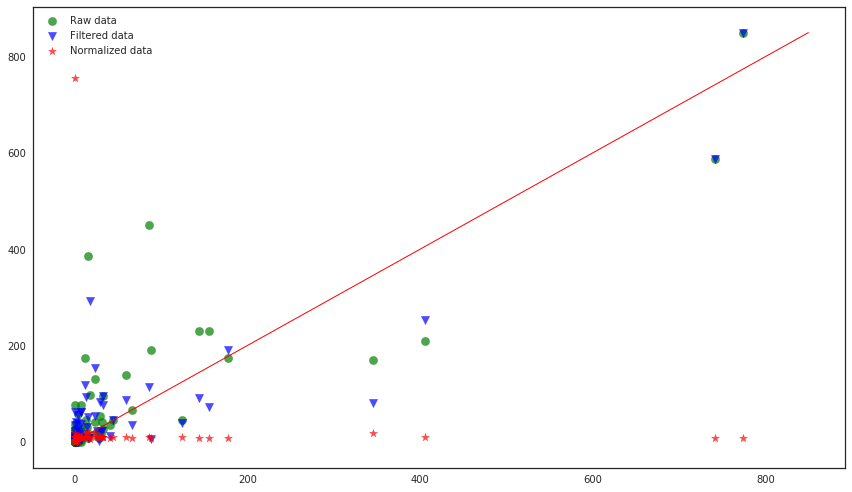

In [19]:
max_value = max(y_test.max(), y.max(), yy.max(), yyy.max())
min_value = min(y_test.min(), y.min(), yy.min(), yyy.min())

plt.figure(figsize=[12, 7])
plt.scatter(y_test, y, c='green', marker='o', s=70, alpha=0.7, label='Raw data')
plt.scatter(y_test, yy, c='blue', marker='v', s=70, alpha=0.7, label='Filtered data')
plt.scatter(y_test, yyy, c='red', marker='*', s=70, alpha=0.7, label='Normalized data')
plt.legend(loc='upper left')
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='-', linewidth=1)
plt.tight_layout()
plt.show()

# Machine Learning

## Facebook Comment Volume

Para o dado problema, foi feito um levantamento dos modelos a serem utilizados
para a proposta de solução. Os modelos selecionados forma baseados na literatura
de artigos, nos quais foram feitos estudos sobre a mesma massa de dados, ou
semelhantes, que está sendo trabalhada neste problema. Com base nos artigos [Kam
aljot](https://archive.ics.uci.edu/ml/datasets/Facebook+Comment+Volume+Dataset)
e [Kamaljot, Ranjeet](http://uksim.info/uksim2015/data/8713a015.pdf), ambos
tratam o problema utilizando modelos de regressão supervisionado. Em ambos os
artigos, o modelo no qual foi retratado como melhor desempenho para a solução,
foi o *Decision Tree*.

Os modelos selecionados para testes neste problema foram:
* Decision tree
* Random Forest
* KNM

Para avaliação dos modelo, foi coletado o valor da pontuação do mesmo utilizando
duas métricas comrparativas, para validar a seleção do modelos com relação a sua
performance sobre a base de dados:
* [R2](http://scikit-
learn.org/stable/modules/generated/sklearn.metrics.r2_score.html), métrica na
qual é mais uma é utilizada para determinar a pontuação de um modelo de
regressão, seu melhor resultado é dado pela nota "1" e podendo ser negativ, pois
o modelo pode ser arbitrariamente pior.
* [MSE](http://scikit-learn.org/stable/modules/model_evaluation.html#median-
absolute-error), métrica utilizada para para avaliar o modelo sendo o valor
esperado da perda de erro ao quadrado ou perda quadrática. A diferença ocorre
devido à aleatoriedade ou porque o estimador não contabiliza informações que
possam produzir uma estimativa mais precisa, sendo necessário no caso para
validar o resultado da métrica anterior.

## Tratamento da Base de dados

Tratamento para a base de testes e treino.

In [20]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Set features and independent variables vector
X_train = trainData.iloc[:, :-1].values
y_train = trainData.iloc[:, -1].values

X_test = testData.iloc[:, :-1].values
y_test = testData.iloc[:, -1].values

print("X values and Y values ready for training and testing!!!")

X values and Y values ready for training and testing!!!


In [21]:
%%time
def plot_graphs(y_train, y_train_pred, y_test, y_test_pred):
    xy_min = 0
    xy_max = 1500

    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 5))

    ax1.scatter(y_train, y_train_pred, c='blue', marker='o', s=50, alpha=0.7, label='Test with Trained Data')
    ax1.set_title('Prediction on Train set')
    ax1.set_xlim([xy_min, xy_max])
    ax1.set_ylim([xy_min, xy_max])
    ax1.plot([xy_min, xy_max], [xy_min, xy_max], color='red', linestyle='-', linewidth=2)

    ax2.scatter(y_test, y_test_pred, c='darkorange', marker='o', s=50, alpha=0.8, label='Test with Test Data')
    ax2.set_title('Prediction on Test set')
    ax2.set_xlim([xy_min, xy_max])
    ax2.set_ylim([xy_min, xy_max])
    ax2.plot([xy_min, xy_max], [xy_min, xy_max], color='red', linestyle='-', linewidth=2)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(15, 5))
    plt.scatter(y_train_pred, y_train - y_train_pred, c='black', marker='o', s=75, alpha=0.7, label='Training data')
    plt.scatter(y_test_pred, y_test - y_test_pred, c='lightgreen', marker='s', s=75, alpha=0.7, label='Test data')
    plt.xlabel('Predicted values', fontsize=18)
    plt.ylabel('Residuals', fontsize=18)
    plt.legend(loc='upper right')
    plt.plot([0, 1250],[0, 0], color='red', linestyle='-', linewidth=2)
    plt.xlim([-20, 1250])
    plt.ylim([-1000, 1500])
    plt.tight_layout()
    plt.show()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.01 µs


## Representação gráfica

Para reO gráfico demonstra os testes do modelo utilizando as bases distintas do
nosso dataset, sendo os testes na base de treino, gŕafico à esquerda e os testes
na base de teste, gráfico a direita. Abaixo temos a representação dos testes no
modelo, onde é representado os dados residuais, nos quais alguns dos valores
ficaram distantes a função do modelo.

## Decision Tree Regression

Uma árvore de regressão é idêntica a uma árvore de decisão porque também é
formada por um conjunto de nós de decisão, perguntas, mas o resultado, em vez de
uma categoria, é um escalar. As mesmas são boas candidatas, pois elas capturam
iterações complexas nos dados.

Para o estudo foi feito os testes do modelo utilizando oa parêmetros *default*
da árvore. sendo esse encontrardo neste [link](http://scikit-learn.org/stable/mo
dules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTre
eRegressor)

Runnning Regression Decision Tree...


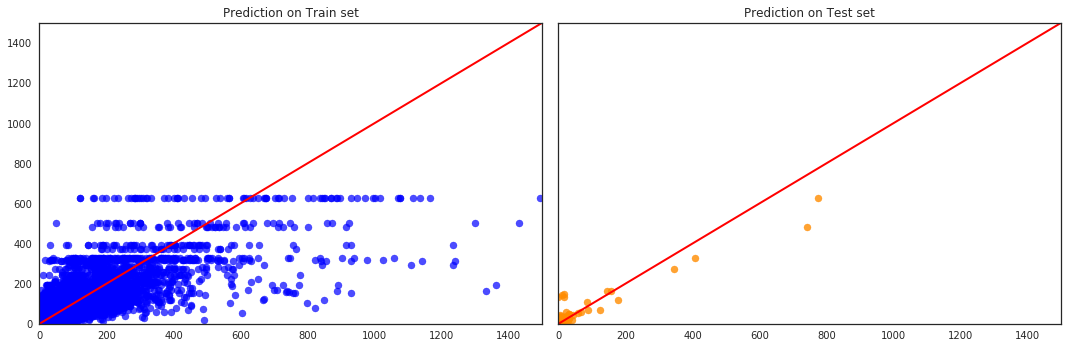

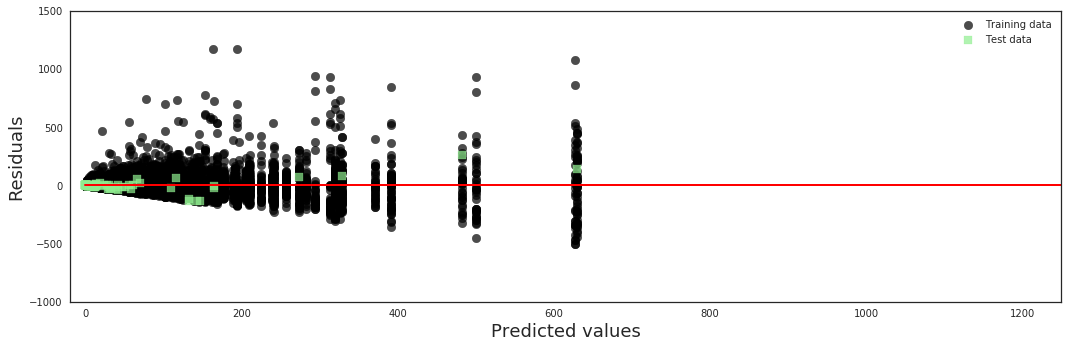

R² Score, on Training set: 0.708, on Testing set: 0.873
Mean Squared Error Score on Testing set: 1808.69
CPU times: user 7.34 s, sys: 1.24 s, total: 8.58 s
Wall time: 7.18 s


In [22]:
%%time
from sklearn.tree import DecisionTreeRegressor

def decision_tree_regressor(X_train, y_train, X_test, y_test):
    print("Runnning Regression Decision Tree...")

    # Runing with best params
    regressor = DecisionTreeRegressor(min_samples_leaf=30, max_depth= 35, max_features= 46)
    regressor.fit(X_train, y_train)

    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)

    plot_graphs(y_train, y_train_pred, y_test, y_test_pred)

    print("R² Score, on Training set: %.3f, on Testing set: %.3f" % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))
    print("Mean Squared Error Score on Testing set: %.2f" % (mean_squared_error(y_test, y_test_pred)))

decision_tree_regressor(X_train, y_train, X_test, y_test)

## Random Forest Regression

É um meta-estimador que se adapta a uma série de árvores de decisão de
classificação em várias sub-amostras do conjunto de dados e utiliza a média para
melhorar a precisão preditiva e controlar a sobreposição.

O modelo tem como parâmetro livre a seleção da quantidade de árvores de decisão.

Runnning Random Forest with 50 Trees...


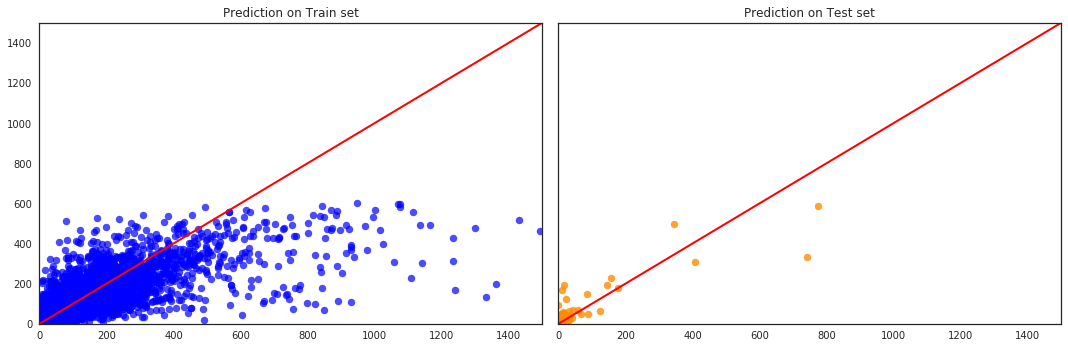

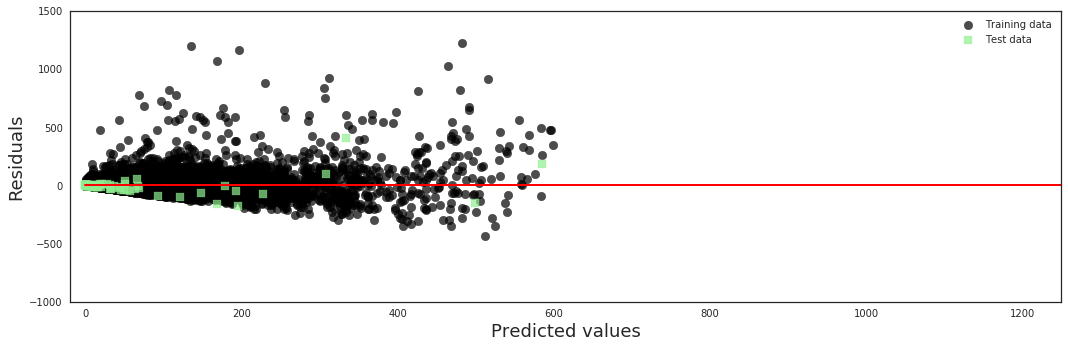

R² Score, on Training set: 0.719, on Testing set: 0.761
Mean Squared Error Score on Testing set: 3391.78
CPU times: user 4min 5s, sys: 1.31 s, total: 4min 7s
Wall time: 1min 6s


In [23]:
%%time
from sklearn.ensemble import RandomForestRegressor

def random_forest_regressor(X_train, y_train, X_test, y_test):
    n_trees = 50
    print("Runnning Random Forest with",n_trees,"Trees...")

    regressor = RandomForestRegressor(n_estimators=n_trees, min_samples_leaf=30, max_depth= 35, max_features= 46, n_jobs=-1)
    regressor.fit(X_train, y_train)

    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)   

    plot_graphs(y_train, y_train_pred, y_test, y_test_pred)

    print("R² Score, on Training set: %.3f, on Testing set: %.3f" % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))
    print("Mean Squared Error Score on Testing set: %.2f" % (mean_squared_error(y_test, y_test_pred)))
    return ('Random forest best params', regressor.score(X_test, y_test))
random_forest = random_forest_regressor(X_train, y_train, X_test, y_test)

# K Ideal
Na maioria dos algoritmos de machine learning, o K no KNN é um hiperparametro
que deve ser escolhido para que o melhor resultado possível possa ser encontrado
em um conjunto de dados. O K pode ser interpretado como o controlador do formato
do limite de decisão do algoritmo.

Exemplificando, quando o K é pequeno, a região de uma suposta predição é
restringida e força o classificador a focar menos na distribuição geral. Um
valor menor de 5 fornece a combinação mais flexivel, o que vai gerar um
desequilibrio menor mas uma variancia maior.

ideal K:  19


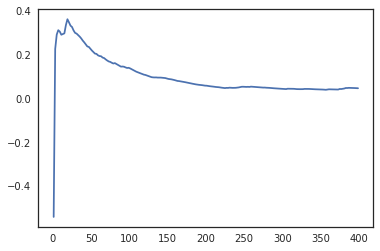

In [25]:
import numpy
from sklearn.neighbors import KNeighborsRegressor

def idealK(x,target,y,target2):
    K = 1
    ab = 0
    vetScore = []
    for i in range(200):
        knn = KNeighborsRegressor(n_neighbors=K)
        knn.fit(x,target)
        score = knn.score(y,target2)
        vetScore.append(score)
        if score > ab:
            ab = score
            d = K
        K += 2
    return d,vetScore
D = numpy.arange(1, 400, 2)
K,score = idealK(X_train, y_train, X_test, y_test)
print("ideal K: ",K)
plt.plot(D,score)

# Algoritmo K-nearest neighbors

No reconhecimento de padrões o algoritmo KNN é um método não para-métrico usado
para classificação e regressão.
Nos dois casos, o input consiste nos k exemplos de treinamento mais proximos no
espaço de amostragem. O output depende se o Knn é usado para classificação ou
regressão.

KNN é um tipo de aprendizado baseado em instâncias, onde a função é aproximada
apenas localmente e toda a computação é deferida até a classificação.

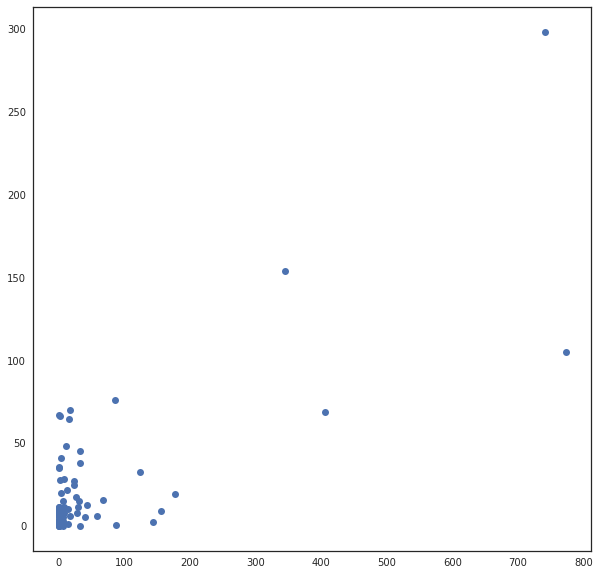

In [34]:
def regressionKnn(x,target,y,target2):
    knn = KNeighborsRegressor(n_neighbors=K)
    knn.fit(x,target)
    vetPredict = knn.predict(y)
    plt.plot(target2, vetPredict, 'o')
    return ('Knn', knn.score(y, target2))

knn = regressionKnn(X_train, y_train, X_test, y_test)


# Otimização

Tentaremos fazer a otimização do modelo de árvore de decisão por ter sido o
modelo com o melhor score, com esta otimização, espera-se aumentar o valor do
score R².

## Escolha

Será feita a escolha com base no modelo que apresentar melhor performance com a
otimização dos parametros livres, entre random forest e decision tree.

In [27]:
from sklearn.model_selection import GridSearchCV

def search_params(regressor_class, tree_parameters):
    regressor = regressor_class()
    grid_search = GridSearchCV(estimator=regressor,
                              param_grid=tree_parameters,
#                           scoring='neg_mean_squared_error',
                              cv = 10,
                              n_jobs=-1)
    grid_search = grid_search.fit(X_train, y_train)
    print(grid_search.best_score_ * -1, grid_search.best_params_)
    return grid_search.best_score_

In [28]:
%%time

tree_parameters = [{'max_depth': [30, 35, 40, 50],
                    'max_features': [40, 46, 53],
                    'min_samples_leaf': [25, 30, 35]}]

# BEST SCORE: 469.696918012 {'min_samples_leaf': 30, 'max_depth': 35, 'max_features': 46}

regressor_score = search_params(DecisionTreeRegressor, tree_parameters)


# Get best parameters for Decision Tree Regressor


decision_tree = ('Decision tree best parameters', regressor_score)

-0.60578357972 {'max_depth': 50, 'max_features': 46, 'min_samples_leaf': 30}
CPU times: user 1min 3s, sys: 407 ms, total: 1min 3s
Wall time: 11min 29s


In [ ]:
%%time

random_parameters = [{'max_depth': [30, 35, 40, 50],
                    'max_features': [40, 46, 53],
                    'min_samples_leaf': [25, 30, 35]}]

regressor_score = search_params(RandomForestRegressor, random_parameters)

random_forest_best = ('Random Forest best parameters', regressor_score) # grid_search.best_score_)

# Resultados

Os resultados finais dos modelos estão armazenados nas variáveis:

* knn - Knn model
* random_forest - Random forest default
* pearson - Remove columns from decision tree data
* normalized - Apply normalization to data run in decision tree
* raw - Raw data in decision tree (base score)
* decision_tree - Decision tree model with best params
* random_forest_best - Random forest with best params

E serão exibidos os resultados abaixo

('Knn', 0.36086668170729996) ('Random forest best params', 0.76099820536606699) ('Pearson decision tree', 0.79424770004376788) ('Normalized decision tree', -0.45424072780923036) ('Raw decision tree', 0.66593366810854349) ('Decision tree best parameters', 0.60578357972017116)


[]

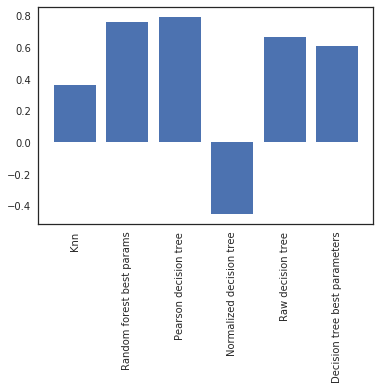

In [32]:
print(knn, random_forest, pearson, normalized, raw, decision_tree)
plt.bar([1,2,3,4,5,6], [knn[1], random_forest[1], pearson[1], normalized[1], raw[1], decision_tree[1]])
plt.xticks([1,2,3,4,5,6], [knn[0], random_forest[0], pearson[0], normalized[0], raw[0], decision_tree[0]], rotation=90)

plt.rcParams['figure.figsize'] = 10, 10
plt.plot()

# Referencias
Artigo relacionado(Kamaljot Singh*, Ranjeet Kaur
Department of Computer Science
DAV University): http://uksim.info/uksim2015/data/8713a015.pdf
KNN: https://goo.gl/XSLTFX
K ideal: https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/#more-on-k
Decision Tree Regressor: http://scikit-
learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-
examples-tree-plot-tree-regression-py
Random Forest Regressor: http://scikit-
learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
GridSearchCV: http://scikit-
learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
Mean Squared Error metric: http://scikit-learn.org/stable/modules/generated/skle
arn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error
Overfitting intuition: https://machinelearningmastery.com/a-simple-intuition-
for-overfitting/